##### WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key_main import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#this is a random set, so the list will always be a different length
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list, filter out duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


##### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
##### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get( city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gwadar
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | sweet home
Processing Record 7 of Set 1 | raja
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | callao
Processing Record 14 of Set 1 | dedovichi
Processing Record 15 of Set 1 | gornozavodsk
Processing Record 16 of Set 1 | kapa'a
Processing Record 17 of Set 1 | tanjung pandan
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | minas de marcona
Processing Record 20 of Set 1 | silleda
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gwadar,25.1216,62.3254,24.52,67,79,1.35,PK,1699407388
1,papatowai,-46.5619,169.4708,12.10,53,91,4.37,NZ,1699407184
2,adamstown,-25.0660,-130.1015,22.71,86,100,8.65,PN,1699407389
3,qaqortoq,60.7167,-46.0333,1.84,59,100,1.31,GL,1699407174
4,bethel,41.3712,-73.4140,14.05,61,0,3.09,US,1699407389


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gwadar,25.1216,62.3254,24.52,67,79,1.35,PK,1699407388
1,papatowai,-46.5619,169.4708,12.10,53,91,4.37,NZ,1699407184
2,adamstown,-25.0660,-130.1015,22.71,86,100,8.65,PN,1699407389
3,qaqortoq,60.7167,-46.0333,1.84,59,100,1.31,GL,1699407174
4,bethel,41.3712,-73.4140,14.05,61,0,3.09,US,1699407389


### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

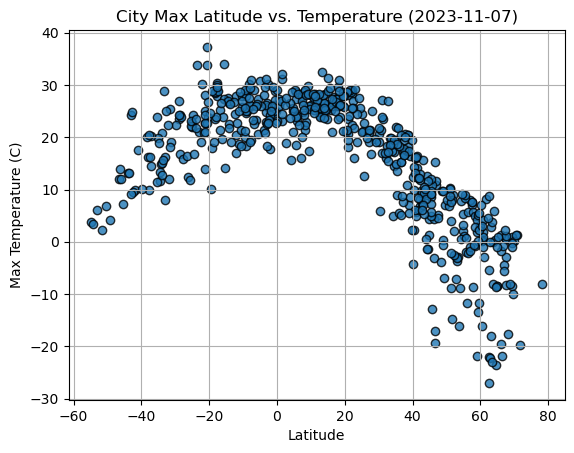

In [9]:
# Build scatter plot for latitude vs. temperature
# x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']
# plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

##### Latitude Vs. Humidity

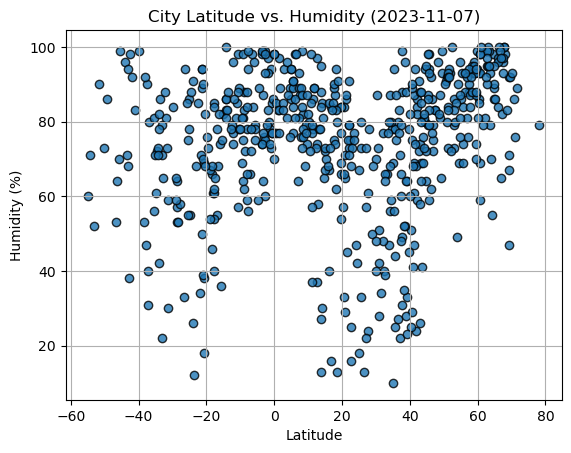

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

##### Latitude Vs. Cloudiness

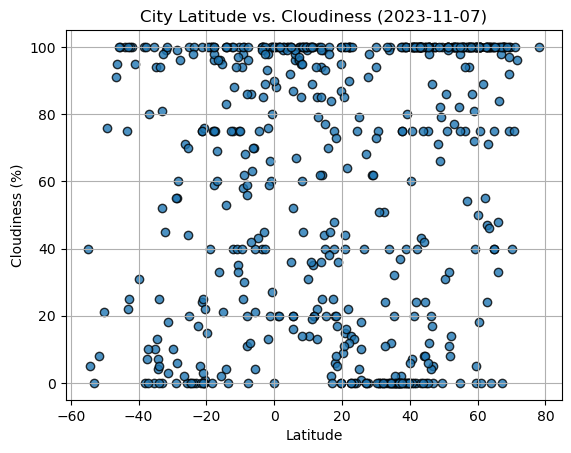

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

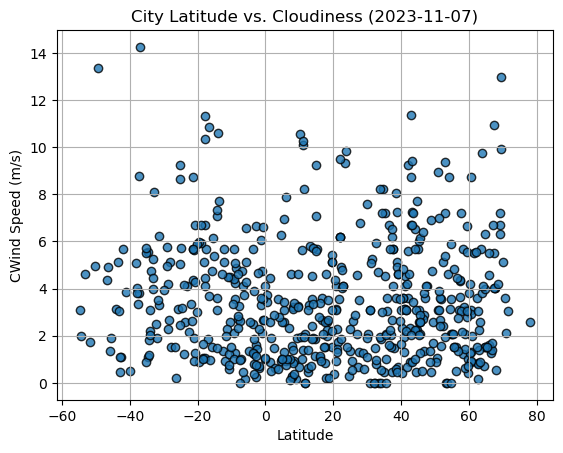

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('CWind Speed (m/s)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

#### Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gwadar,25.1216,62.3254,24.52,67,79,1.35,PK,1699407388
3,qaqortoq,60.7167,-46.0333,1.84,59,100,1.31,GL,1699407174
4,bethel,41.3712,-73.4140,14.05,61,0,3.09,US,1699407389
5,sweet home,44.3976,-122.7362,9.30,80,24,0.45,US,1699407390
6,raja,8.4596,25.6780,22.94,82,100,0.95,SS,1699407390


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,12.10,53,91,4.37,NZ,1699407184
2,adamstown,-25.0660,-130.1015,22.71,86,100,8.65,PN,1699407389
8,saint-pierre,-21.3393,55.4781,22.82,94,75,5.66,RE,1699407231
9,ushuaia,-54.8000,-68.3000,3.81,60,40,3.09,AR,1699407336
11,port-aux-francais,-49.3500,70.2167,4.25,86,76,13.34,TF,1699407391


####  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7450212734965548


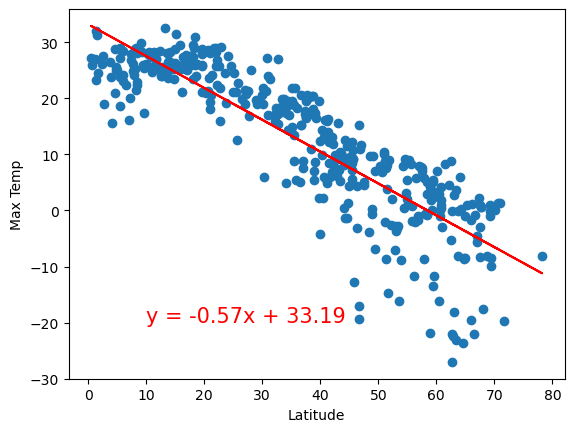

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,-20))

The r-value is: 0.4392515899428532


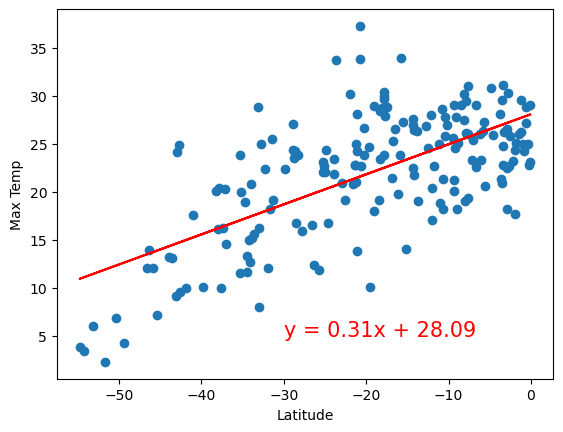

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,5))

**Discussion about the linear relationship:** The linear regression line for temperature vs latitude is negative in the Northern Hemisphere and is positive in the Southern Hemisphere. The correlation factor of in the Northern hemisphere is 0.76 which is considered a strong correlation. The correlation factor in the Southern hemisphere is 0.44 which is considered to be a weak correlation. At the equator, which is latitude of zero, the sun hits the earth in a direst fashion. The sun will cause the temperature to be warmer closer to zero. As the latitude becomes greater, in the Northern Hemisphere, the temperature goes down as it approaches the Arctic Circle. 

#### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0455346938837281


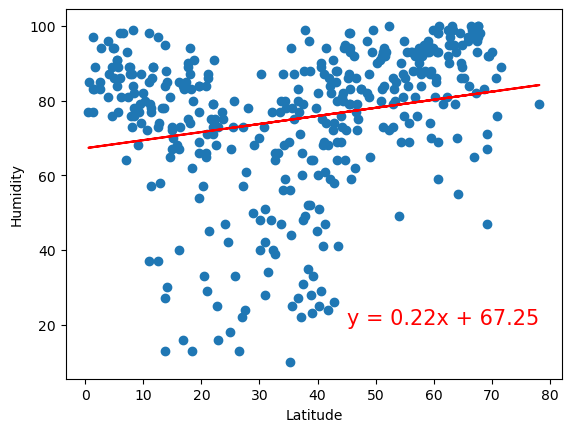

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(45,20))

The r-value is: 0.06548621256152619


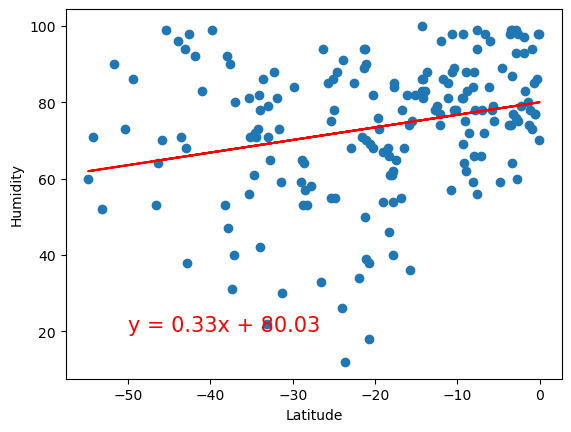

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-50,20))

**Discussion about the linear relationship:** The linear regression line for humidity vs latitude is postive in both Northen Hemiphere and Southern Hemisphere. The correlation for both the are below 0.3, which is considered no correlation or very weak.

#### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.019365342549272167


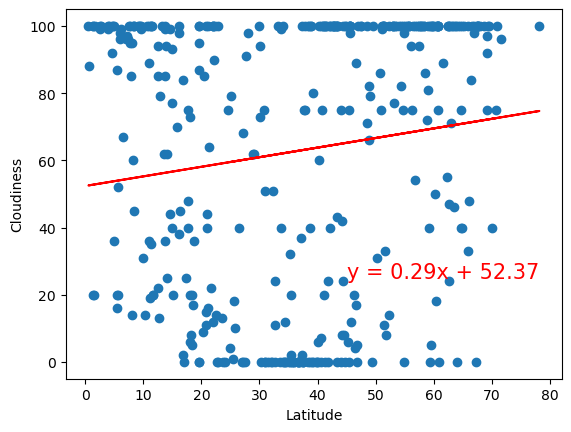

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,25))

The r-value is: 0.038967888396797976


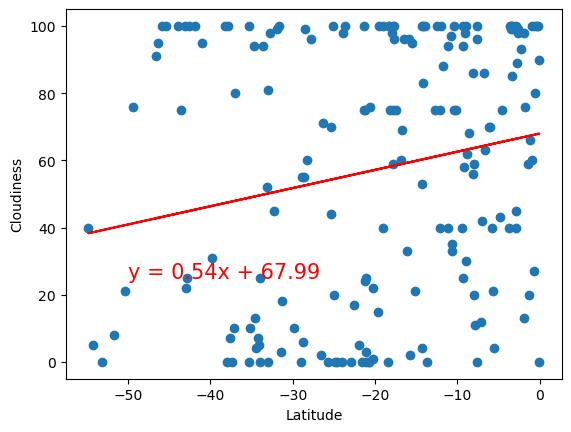

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-50,25))

**Discussion about the linear relationship:** The linear regression line in both the Northern and Southern Hemisphere is poistive for cloudiness vs latitude. However, the correlation factor for both hemispheres are below 0.3, which is considered no correlation of very week.

#### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01592246813471318


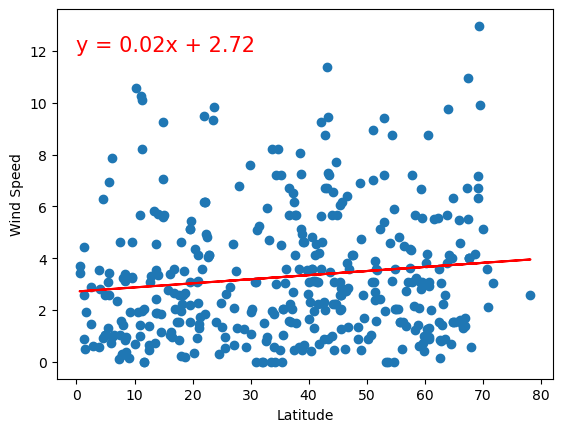

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(0,12))

The r-value is: 0.024061483755470375


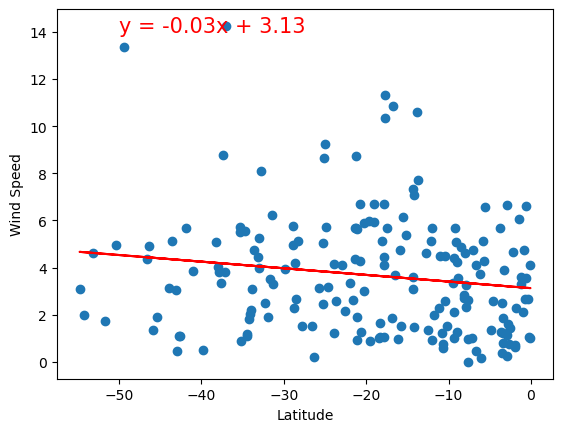

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,14))

**Discussion about the linear relationship:** The linear regression line in the Northern Hemisphere is positive, and the negative in the Southern Hemisphere. Both correlation in each hemipshere is below 0.3 and this is considered no correlation or very weak.

**Conclusion:** The only significant finding in correlation, considering all graphs, is a direct corrrelation in the Northern Hemisphere of temperature vs. latitude.